In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests
import random

In [82]:
MAX = 20

API_KEY = "48e0bf10bd721602a930738080e4daf4"
url = f"https://api.themoviedb.org/3/movie/{{}}?api_key={API_KEY}&append_to_response=budget,revenue"

all_movies = []

page_number = 1
while page_number < MAX:
    random_number = random.random()
    random_page_number = random.randint(1, MAX)
    response = requests.get(f"https://api.themoviedb.org/3/discover/movie?api_key={API_KEY}&sort_by=vote_count.desc&random={random_number}&page={random_page_number}")
    if response.status_code == 200:
        data = response.json()
        for movie in data['results']:
            movie_id = movie['id']
            movie_response = requests.get(url.format(movie_id))
            if movie_response.status_code == 200:
                movie_data = movie_response.json()
                cast_response = requests.get(f"https://api.themoviedb.org/3/movie/{movie_id}/credits?api_key={API_KEY}")
                if cast_response.status_code == 200:
                    cast_data = cast_response.json()
                    budget = movie_data['budget']
                    revenue = movie_data['revenue']
                    if budget == 0 or revenue == 0:
                        continue  # exclude movies with budget or revenue 0
                    release_date = movie_data['release_date']
                    if release_date:
                        release_decade = release_date[:3] + '0s'
                    else:
                        release_decade = None
                    all_movies.append({
                        'Title': movie_data['title'],
                        'Genres': [genre['name'] for genre in movie_data['genres']],
                        'Cast': [actor['name'] for actor in cast_data['cast']][:5],
                        'Budget': budget,
                        'Revenue': revenue,
                        'Popularity': movie_data['popularity'],
                        'Vote_average': movie_data['vote_average'],
                        'Release_decade': release_decade,
                    })
                else:
                    print(f"Error {cast_response.status_code}: {cast_response.reason}")
                    break
            else:
                print(f"Error {movie_response.status_code}: {movie_response.reason}")
                break
        total_pages = data['total_pages']
        if page_number >= total_pages:
            break
        page_number += 1
    else:
        print(f"Error {response.status_code}: {response.reason}")
        break

df = pd.DataFrame(all_movies)
df.head(100)

,Title,Genres,Cast,Budget,Revenue,Popularity,Vote_average,Release_decade
0,Inception,"[Action, Science Fiction, Adventure]","[Leonardo DiCaprio, Joseph Gordon-Levitt, Ken ...",160000000,825532764,110.057,8.362,2010s
1,Interstellar,"[Adventure, Drama, Science Fiction]","[Matthew McConaughey, Anne Hathaway, Jessica C...",165000000,701729206,133.077,8.398,2010s
2,The Dark Knight,"[Drama, Action, Crime, Thriller]","[Christian Bale, Heath Ledger, Michael Caine, ...",185000000,1004558444,85.928,8.509,2000s
3,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[Sam Worthington, Zoe Saldaña, Sigourney Weave...",237000000,2920357254,282.105,7.569,2000s
4,The Avengers,"[Science Fiction, Action, Adventure]","[Robert Downey Jr., Chris Evans, Mark Ruffalo,...",220000000,1518815515,173.385,7.708,2010s
...,...,...,...,...,...,...,...,...
95,Pacific Rim,"[Action, Science Fiction, Adventure]","[Charlie Hunnam, Rinko Kikuchi, Idris Elba, Ma...",180000000,411002906,93.028,6.865,2010s
96,Wreck-It Ralph,"[Family, Animation, Comedy, Adventure]","[John C. Reilly, Sarah Silverman, Jack McBraye...",165000000,471222889,93.574,7.323,2010s
97,Terminator 2: Judgment Day,"[Action, Thriller, Science Fiction]","[Arnold Schwarzenegger, Linda Hamilton, Edward...",102000000,520000000,74.273,8.095,1990s
98,Shutter Island,"[Drama, Thriller, Mystery]","[Leonardo DiCaprio, Mark Ruffalo, Ben Kingsley...",80000000,294800000,46.067,8.197,2010s


In [64]:
print(df.head(100))

                                    Title  \
0                                     300   
1          Jumanji: Welcome to the Jungle   
2                        Edge of Tomorrow   
3                            Men in Black   
4                            Blade Runner   
..                                    ...   
95               The Grand Budapest Hotel   
96  Eternal Sunshine of the Spotless Mind   
97                                Memento   
98                            Ratatouille   
99                                 Frozen   

                                          Genres  \
0                       [Action, Adventure, War]   
1           [Adventure, Action, Comedy, Fantasy]   
2                      [Action, Science Fiction]   
3   [Action, Adventure, Comedy, Science Fiction]   
4             [Science Fiction, Drama, Thriller]   
..                                           ...   
95                               [Comedy, Drama]   
96             [Science Fiction, Drama, Rom

In [66]:
print(df.describe())

             Budget       Revenue  Popularity  Vote_average
count  1.740000e+02  1.740000e+02  174.000000    174.000000
mean   1.249348e+08  6.542366e+08   79.177023      7.433523
std    7.386228e+07  3.497372e+08   40.714486      0.595834
min    3.300000e+06  1.309200e+07   11.194000      5.908000
25%    6.600000e+07  3.726419e+08   48.503250      6.989000
50%    1.250000e+08  6.237260e+08   74.856000      7.400000
75%    1.750000e+08  9.101167e+08  101.111000      7.889000
max    3.650000e+08  1.405404e+09  191.387000      8.569000


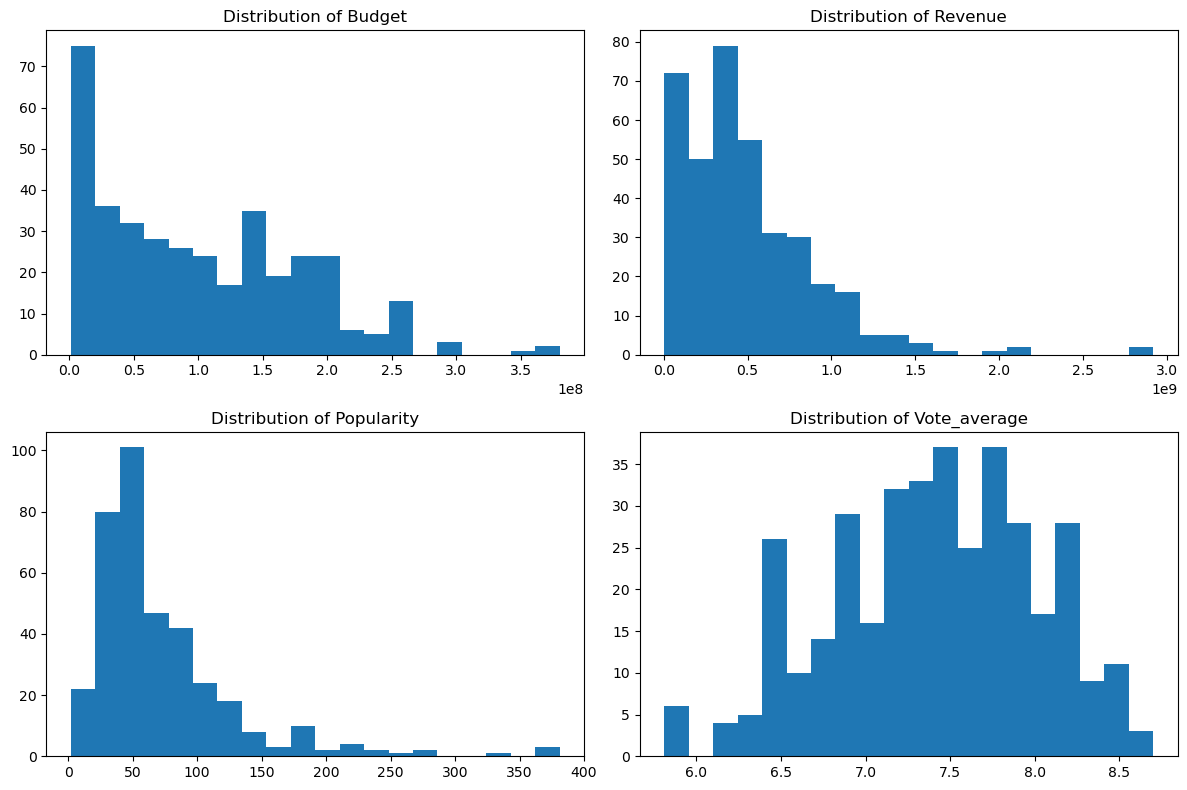

In [83]:
num_cols = ['Budget', 'Revenue', 'Popularity', 'Vote_average']

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()

for i, col in enumerate(num_cols):
    axs[i].hist(df[col], bins=20)
    axs[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

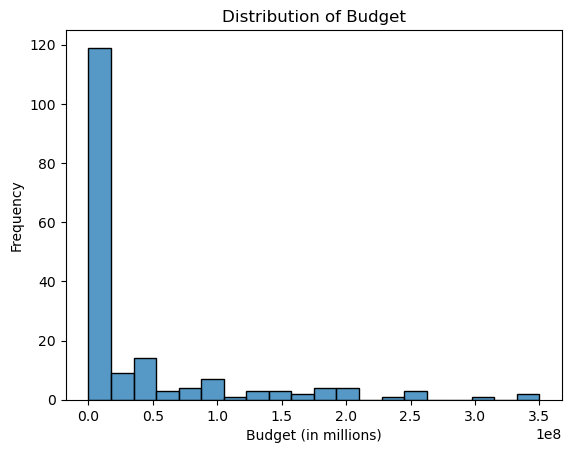

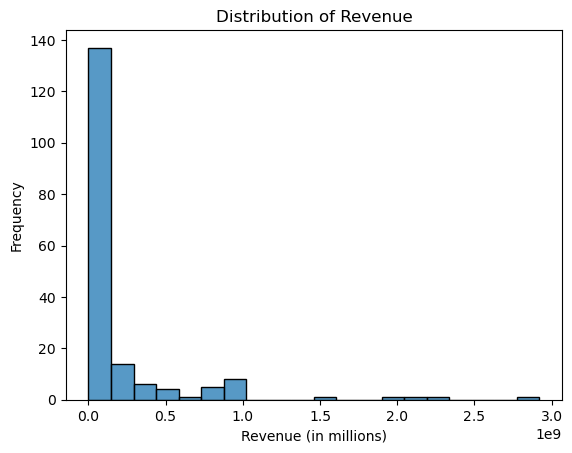

In [33]:
sns.histplot(data=df, x='Budget', bins=20)
plt.title('Distribution of Budget')
plt.xlabel('Budget (in millions)')
plt.ylabel('Frequency')
plt.show()

sns.histplot(data=df, x='Revenue', bins=20)
plt.title('Distribution of Revenue')
plt.xlabel('Revenue (in millions)')
plt.ylabel('Frequency')
plt.show()


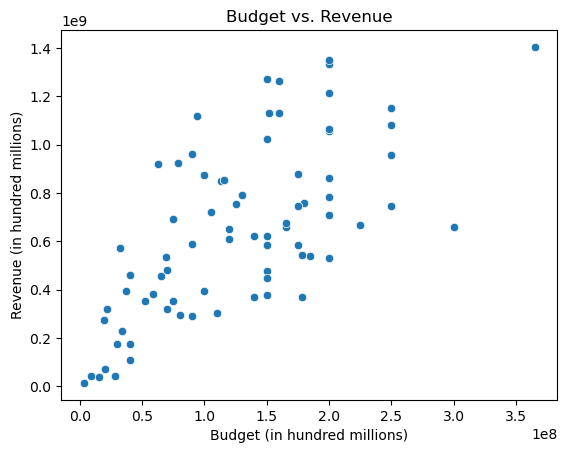

In [68]:
sns.scatterplot(data=df, x='Budget', y='Revenue')
plt.title('Budget vs. Revenue')
plt.xlabel('Budget (in hundred millions)')
plt.ylabel('Revenue (in hundred millions)')
plt.show()

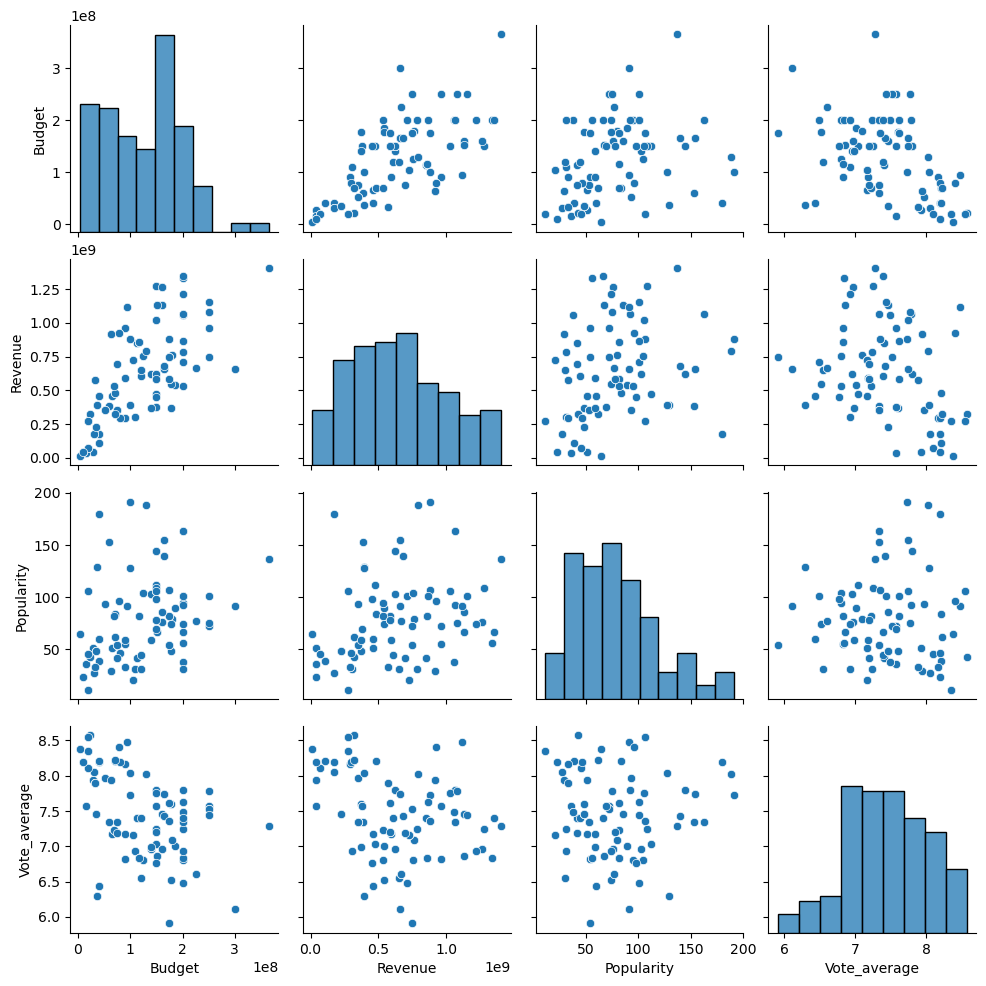

In [69]:
sns.pairplot(data=df, vars=['Budget', 'Revenue', 'Popularity', 'Vote_average'])
plt.show()


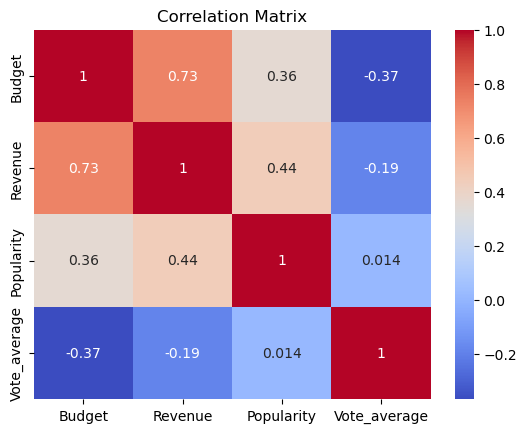

In [84]:
corr = df[['Budget', 'Revenue', 'Popularity', 'Vote_average']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

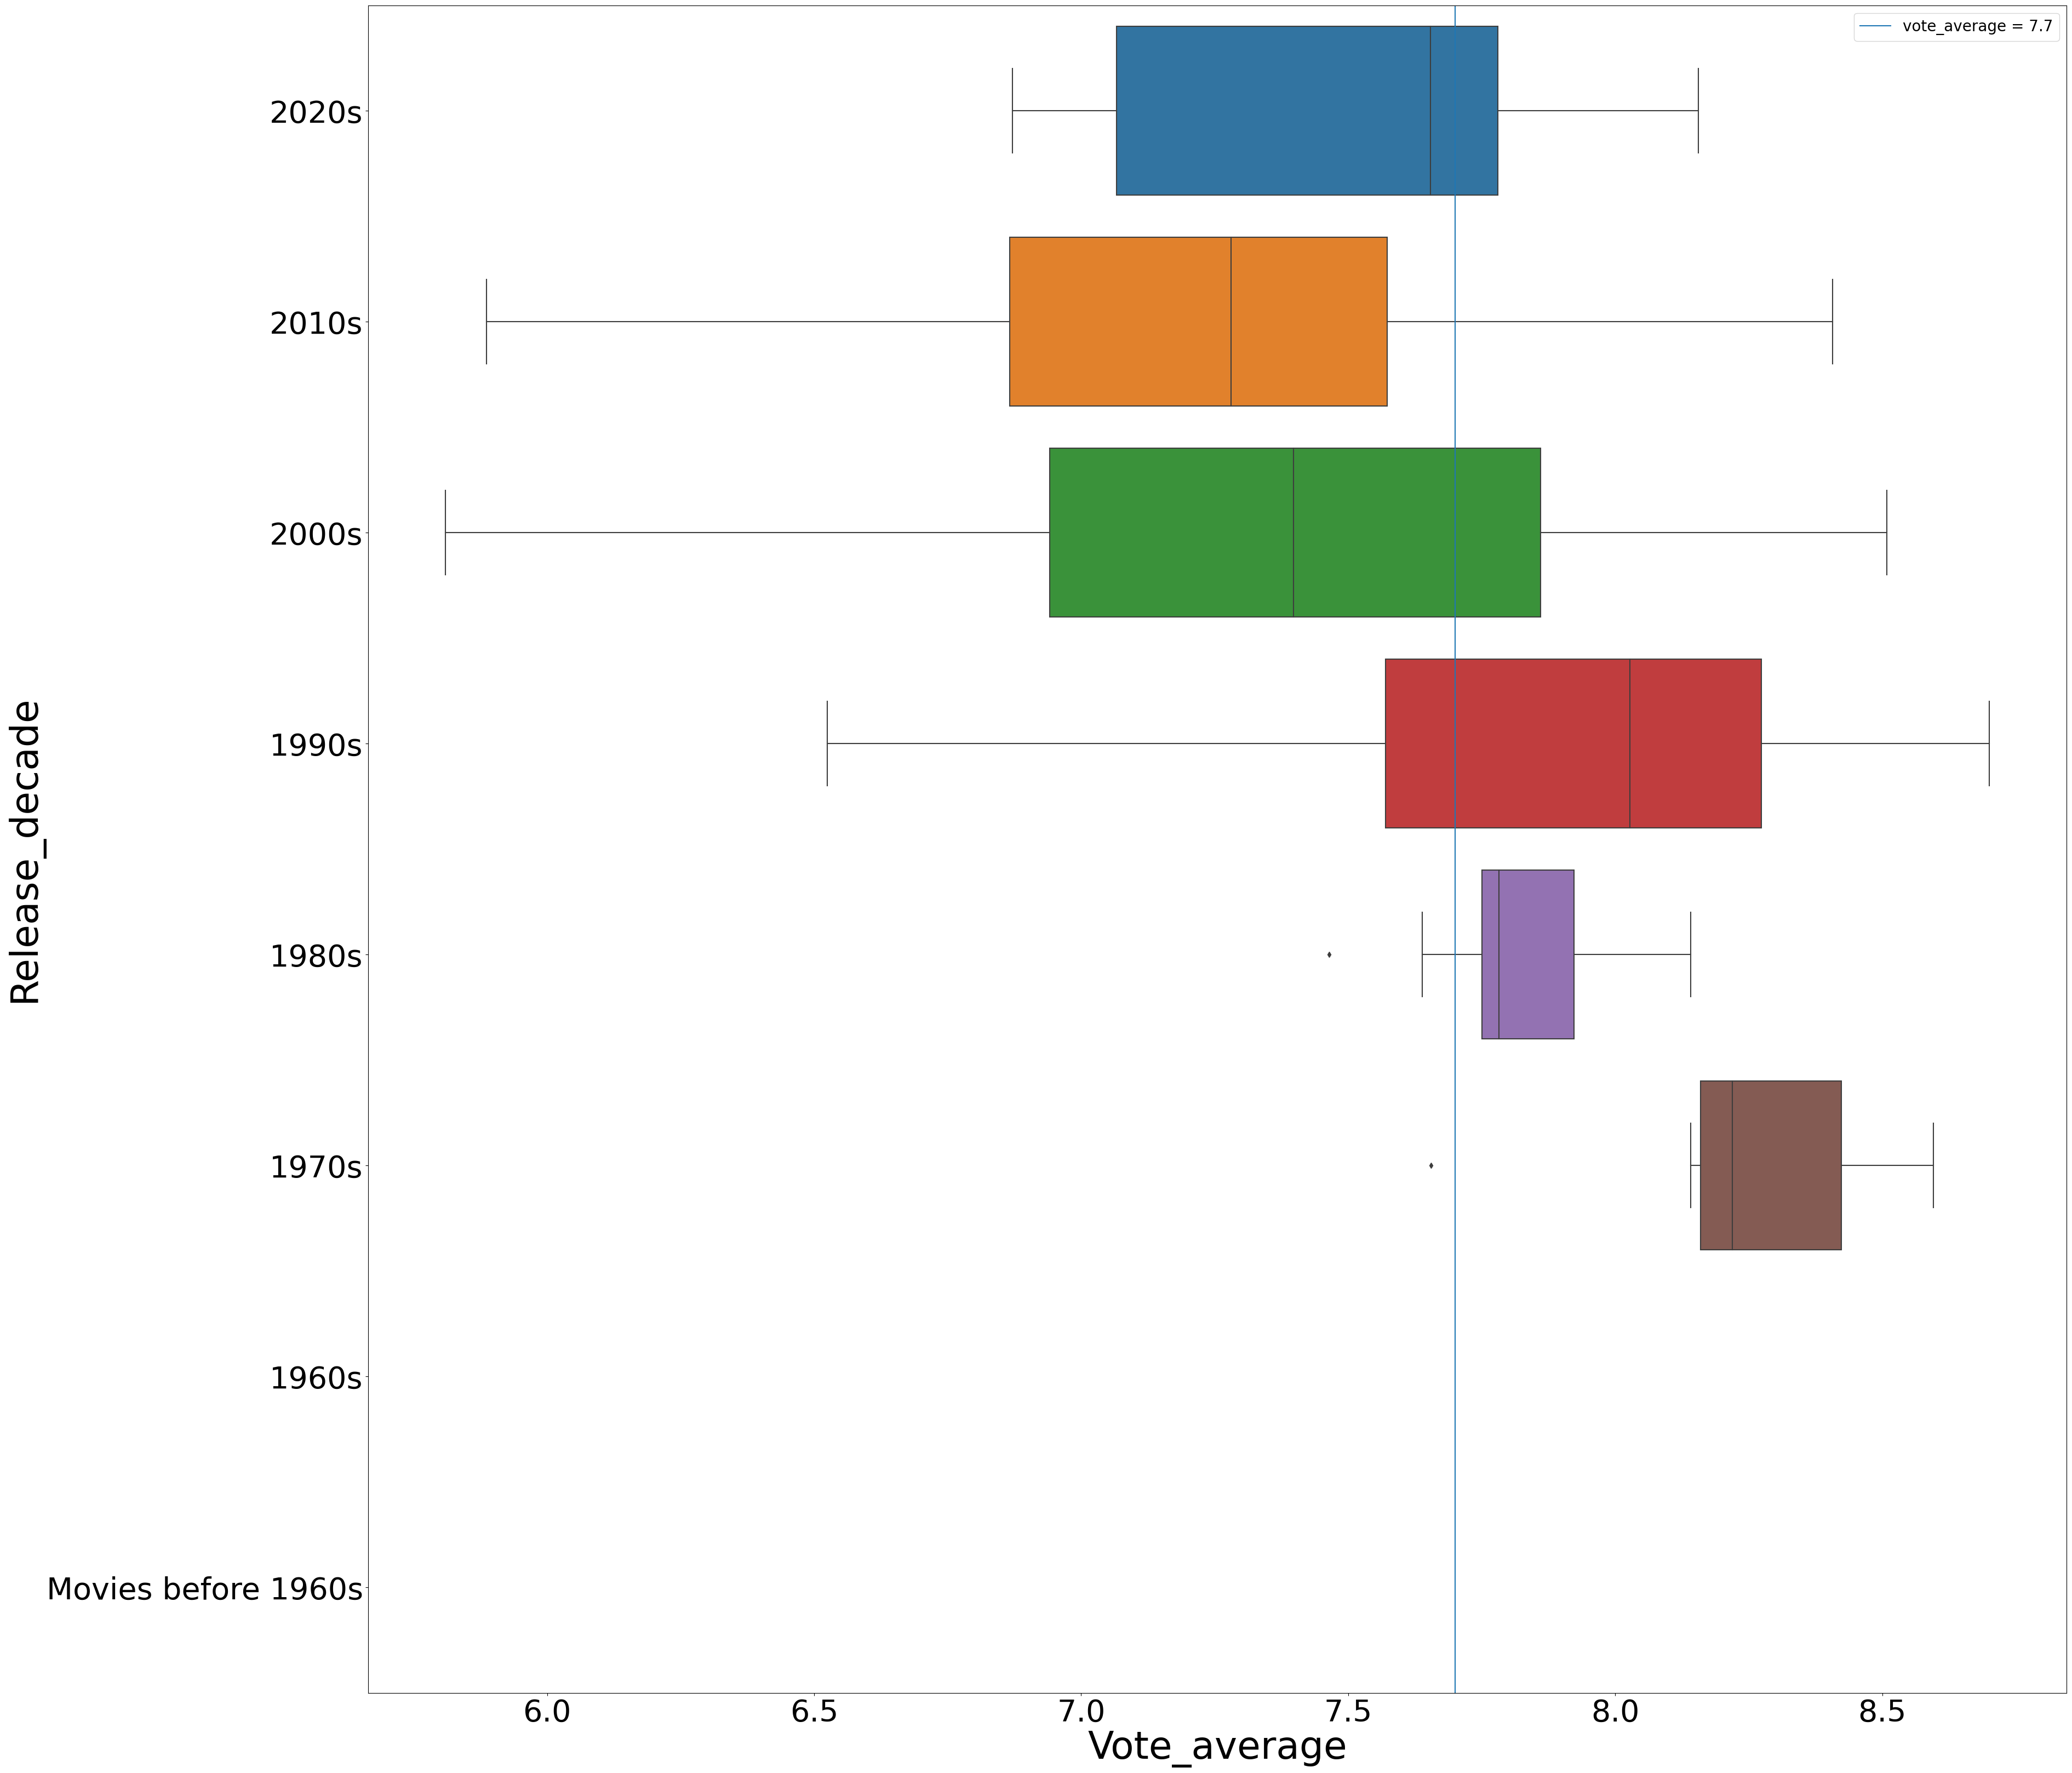

In [85]:
f, ax= plt.subplots(figsize=(40, 40))
sns.boxplot(x = "Vote_average", y = "Release_decade", data = df, orient = "h",order = ["2020s","2010s", "2000s", "1990s", "1980s", "1970s", "1960s", "Movies before 1960s"])
ax.tick_params(axis='y', labelsize=40)
ax.tick_params(axis='x', labelsize=40)
ax.set_xlabel("Vote_average",fontsize=50)
ax.set_ylabel("Release_decade",fontsize=50)
plt.axvline(7.7, label= "vote_average = 7.7")
plt.legend(fontsize=20)
plt.show()

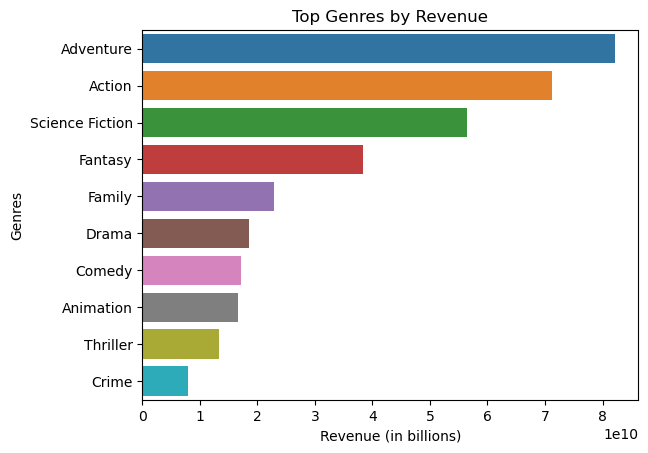

In [77]:
genre_revenue = df.explode('Genres').groupby('Genres')['Revenue'].sum().reset_index()
genre_revenue = genre_revenue.sort_values('Revenue', ascending=False).head(10)
sns.barplot(data=genre_revenue, x='Revenue', y='Genres')
plt.title('Top Genres by Revenue')
plt.xlabel('Revenue (in billions)')
plt.ylabel('Genres')
plt.show()


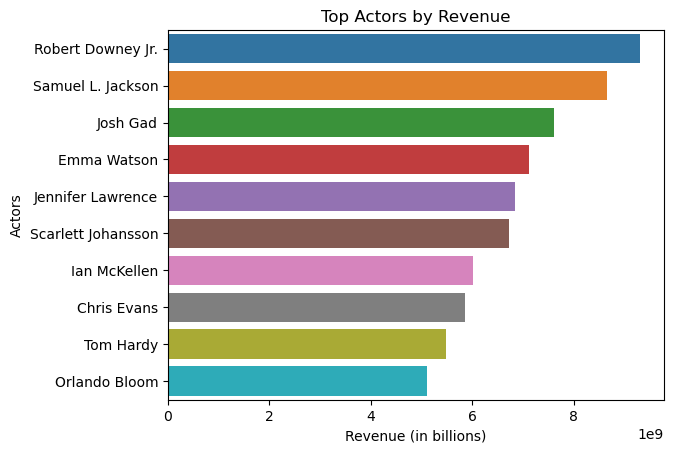

In [76]:
actor_revenue = df.explode('Cast').groupby('Cast')['Revenue'].sum().reset_index()
actor_revenue = actor_revenue.sort_values('Revenue', ascending=False).head(10)
sns.barplot(data=actor_revenue, x='Revenue', y='Cast')
plt.title('Top Actors by Revenue')
plt.xlabel('Revenue (in billions)')
plt.ylabel('Actors')
plt.show()